In [1]:
%%time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
# datetime processing
import datetime as datetime
from datetime import datetime as dt
today=dt.today()

# today = datetime.date(month=today.month, day=today.day, year=today.year)
yesterday=today-datetime.timedelta(days=1)

import pylab
pylab.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

#custom fetch
import fetcher
fetcher.fetch()
print(f"LOCAL FETCH: world_{today.strftime('%b-%d-%Y')}.csv")
df = pd.read_csv(f"world_{today.strftime('%b-%d-%Y')}.csv",index_col='date', parse_dates=True)
print("LOCAL FETCH COMPLETE.")
#custom fetch

usa=df[df['location'] == 'United States']
# usa_rolling7=usa.new_deaths.rolling(7).mean().fillna(0)
usa_daily=usa['total_deaths'].diff(1)
yesterday=usa_daily[-1]
usa_rolling7=usa_daily.rolling(7).mean()

COVID FILE does NOT EXIST. 
Creating...
..............
..............
..............
CREATED: world_Feb-01-2022.csv
Time Elapsed:  0:00:33.523004  seconds
LOCAL FETCH: world_Feb-01-2022.csv
LOCAL FETCH COMPLETE.
Wall time: 37.1 s


In [2]:
usa.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [3]:
usa['new_cases']

date
2020-01-22         NaN
2020-01-23         0.0
2020-01-24         1.0
2020-01-25         0.0
2020-01-26         3.0
                ...   
2022-01-27    443607.0
2022-01-28    642857.0
2022-01-29    169002.0
2022-01-30     96887.0
2022-01-31    608201.0
Name: new_cases, Length: 741, dtype: float64

In [4]:
usa['aged_65_older'].idxmax(), usa['aged_65_older'].max()

(Timestamp('2020-01-22 00:00:00'), 15.413)

In [5]:
usa['aged_65_older'].var()

6.193027158415074e-28

In [6]:
usa['positive_rate'].head(50)

date
2020-01-22      NaN
2020-01-23      NaN
2020-01-24      NaN
2020-01-25      NaN
2020-01-26      NaN
2020-01-27      NaN
2020-01-28      NaN
2020-01-29      NaN
2020-01-30      NaN
2020-01-31      NaN
2020-02-01      NaN
2020-02-02      NaN
2020-02-03      NaN
2020-02-04      NaN
2020-02-05      NaN
2020-02-06      NaN
2020-02-07      NaN
2020-02-08      NaN
2020-02-09      NaN
2020-02-10      NaN
2020-02-11      NaN
2020-02-12      NaN
2020-02-13      NaN
2020-02-14      NaN
2020-02-15      NaN
2020-02-16      NaN
2020-02-17      NaN
2020-02-18      NaN
2020-02-19      NaN
2020-02-20      NaN
2020-02-21      NaN
2020-02-22      NaN
2020-02-23      NaN
2020-02-24      NaN
2020-02-25      NaN
2020-02-26      NaN
2020-02-27      NaN
2020-02-28      NaN
2020-02-29      NaN
2020-03-01      NaN
2020-03-02      NaN
2020-03-03      NaN
2020-03-04      NaN
2020-03-05      NaN
2020-03-06      NaN
2020-03-07    0.108
2020-03-08    0.112
2020-03-09    0.110
2020-03-10    0.114
2020-03-11    0

In [7]:
usa['new_cases'].tail()

date
2022-01-27    443607.0
2022-01-28    642857.0
2022-01-29    169002.0
2022-01-30     96887.0
2022-01-31    608201.0
Name: new_cases, dtype: float64

In [8]:
usa_daily.tail()

date
2022-01-27    2359.0
2022-01-28    3875.0
2022-01-29    1058.0
2022-01-30     321.0
2022-01-31    2422.0
Name: total_deaths, dtype: float64

In [9]:
usa['new_deaths'].tail(700).ne(usa_daily.tail(700))

date
2020-03-03    False
2020-03-04    False
2020-03-05    False
2020-03-06    False
2020-03-07    False
              ...  
2022-01-27    False
2022-01-28    False
2022-01-29    False
2022-01-30    False
2022-01-31    False
Length: 700, dtype: bool

In [10]:
filter1= usa['new_deaths'].tail(700).ne(usa_daily.tail(700))

filter1.index[filter1.values]

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [11]:
# df = pd.DataFrame({'BoolCol': [True, False, False, True, True]},
#        index=[10,20,30,40,50])

# In [53]: df
# Out[53]: 
#    BoolCol
# 10    True
# 20   False
# 30   False
# 40    True
# 50    True

# [5 rows x 1 columns]

# In [54]: df.index[df['BoolCol']].tolist()
# Out[54]: [10, 40, 50]

In [12]:
usa['new_deaths'].tail(700).ne(usa_daily.tail(700))

date
2020-03-03    False
2020-03-04    False
2020-03-05    False
2020-03-06    False
2020-03-07    False
              ...  
2022-01-27    False
2022-01-28    False
2022-01-29    False
2022-01-30    False
2022-01-31    False
Length: 700, dtype: bool

# <font color ='lime'>

# <font color=#cf0234> Total COVID-19 Deaths in United States as of Today </font>

In [13]:
# sigma_cases=sum(usa_daily.fillna(0))
print(f"USA TOTAL DEATH COUNT: {sum(usa_daily.fillna(0)):,} as of "+today.strftime("%A")+' '+str( today))

USA TOTAL DEATH COUNT: 886,681.0 as of Tuesday 2022-02-01 01:10:49.934333


# <font color=#cf0234> Yesterday's Deaths </font>
   

In [14]:
print(f"Yesterday's Deaths {today}: ",f"{yesterday:,}")

Yesterday's Deaths 2022-02-01 01:10:49.934333:  2,422.0


# <font color=#cf0234> Most recent daily deaths </font>
   

[]

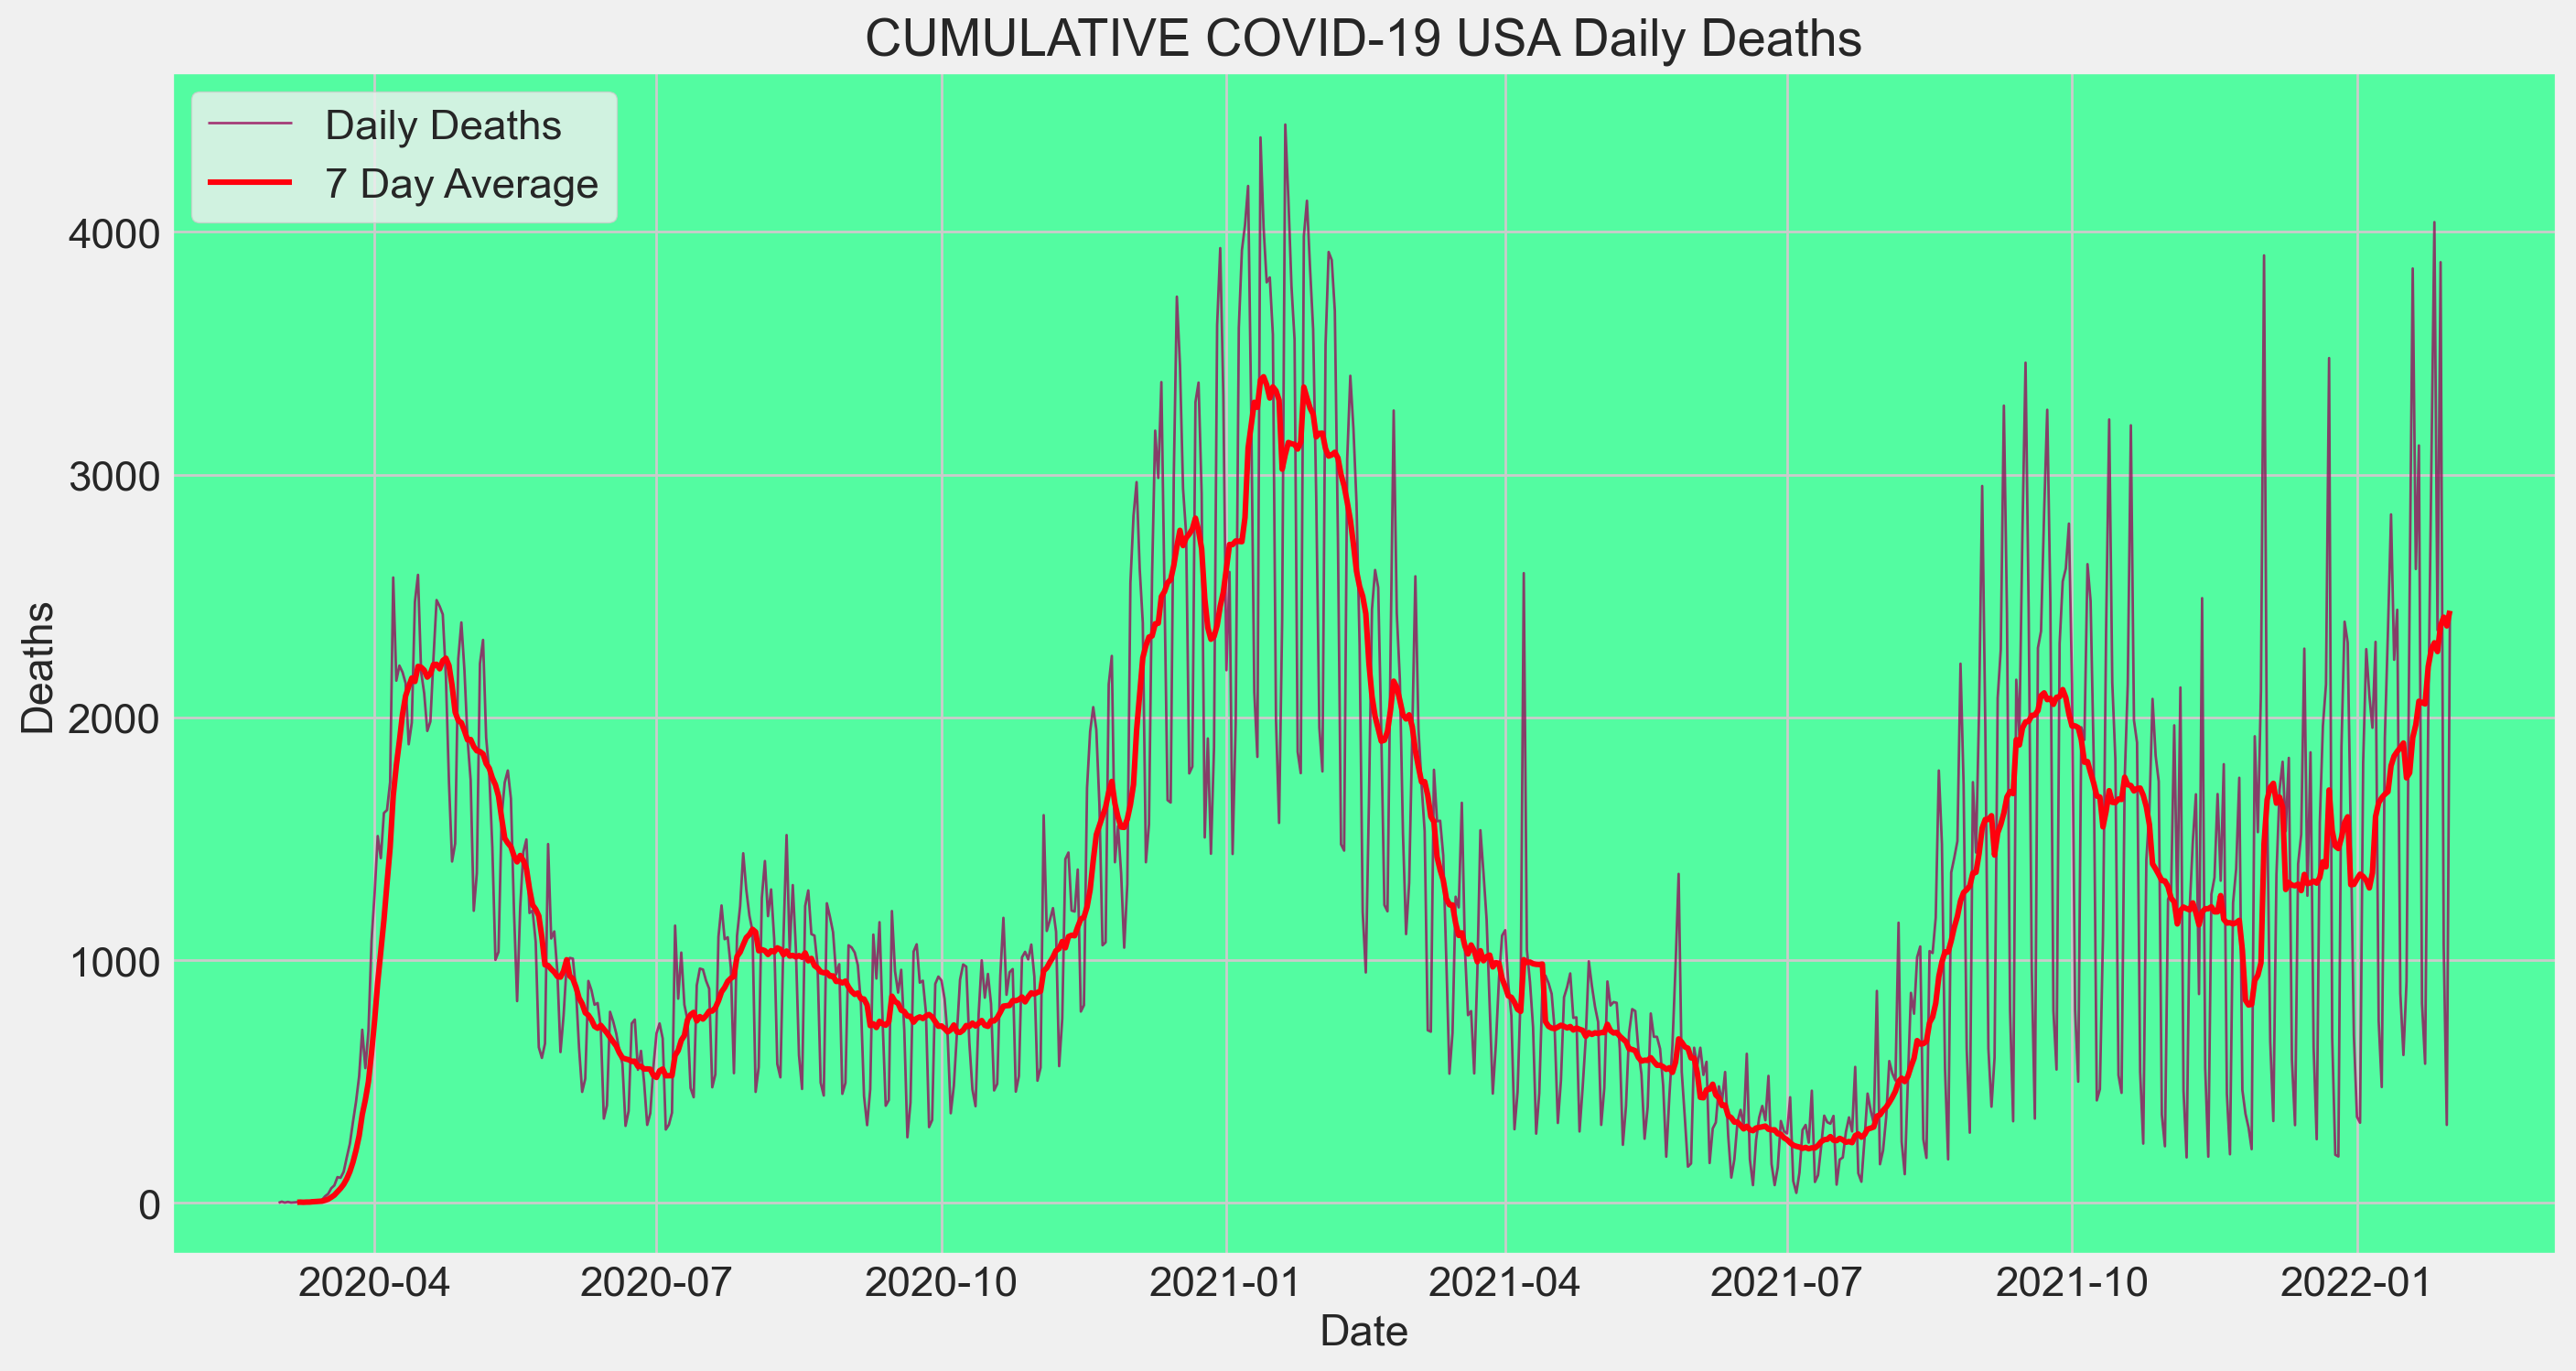

In [15]:
fig = plt.figure(figsize=(15,8),dpi=200)
x1=usa['total_deaths'].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',label='Daily Deaths',lw=1,alpha=0.75)
ax=sns.lineplot(data=usa_rolling7, x=usa_rolling7.index,y=usa_rolling7,color='#ff000d',label='7 Day Average',lw=2.2)
ax.set_title('CUMULATIVE COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
plt.plot()
# fig.savefig(f'{today}_covid_deaths_all.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

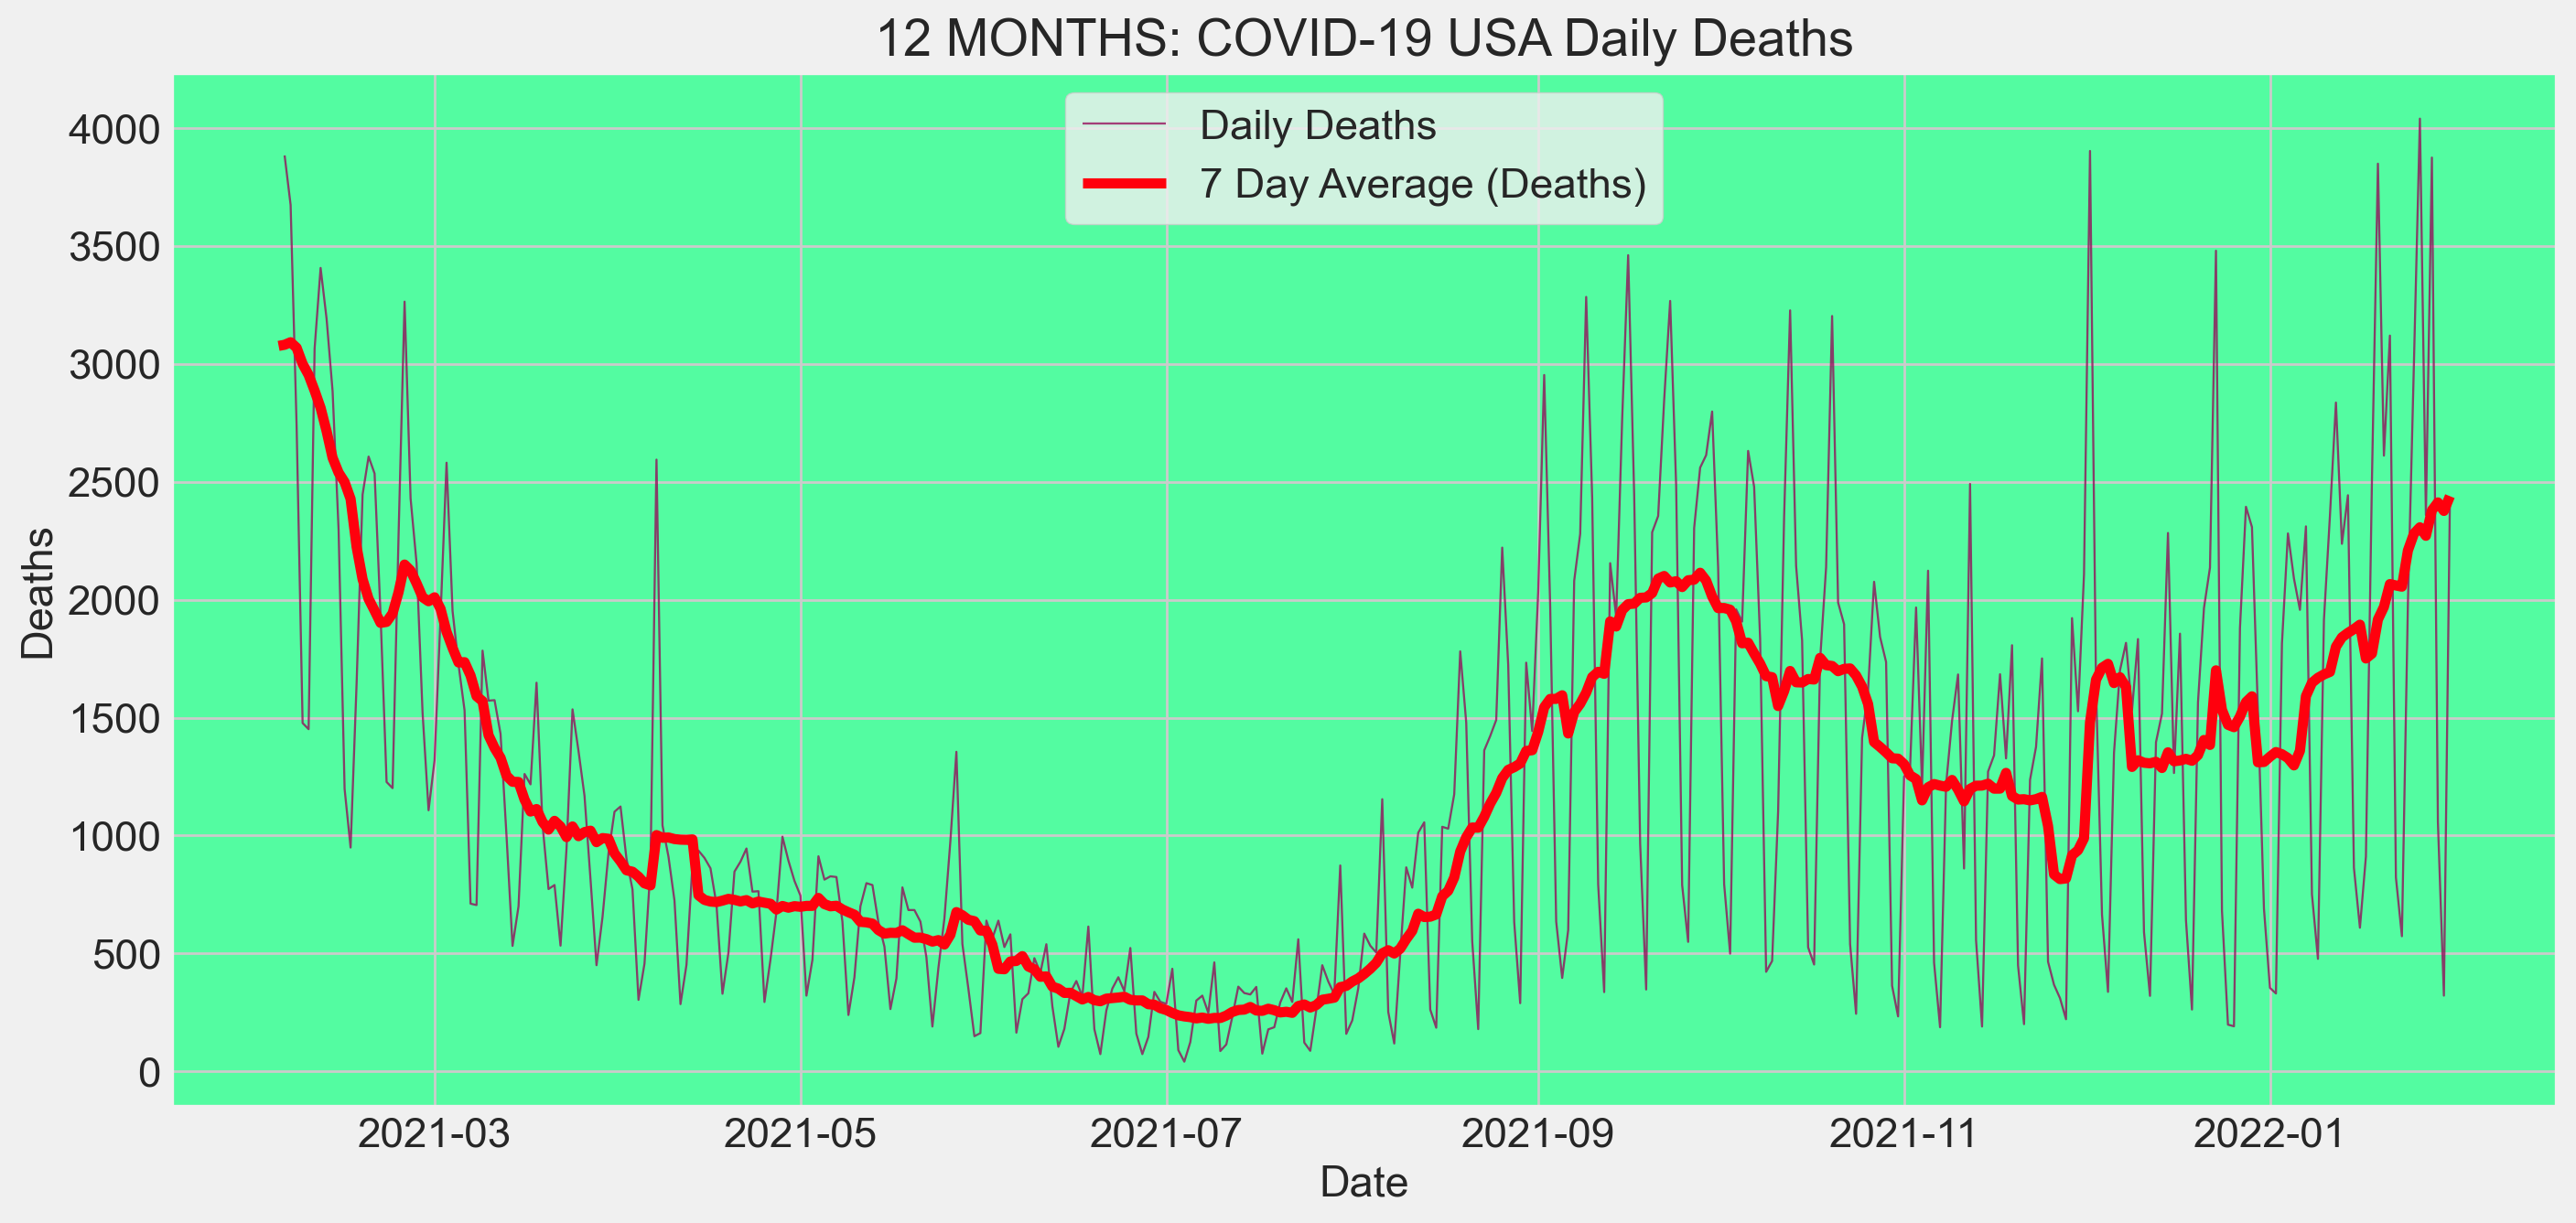

In [16]:
start=today-datetime.timedelta(weeks=52)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,7),dpi=200)
x1=usa['total_deaths'].loc[start:].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',lw=0.83,alpha=0.75, label='Daily Deaths')
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,color='#ff000d',label='7 Day Average (Deaths)')
ax.set_title('12 MONTHS: COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid19_deaths.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

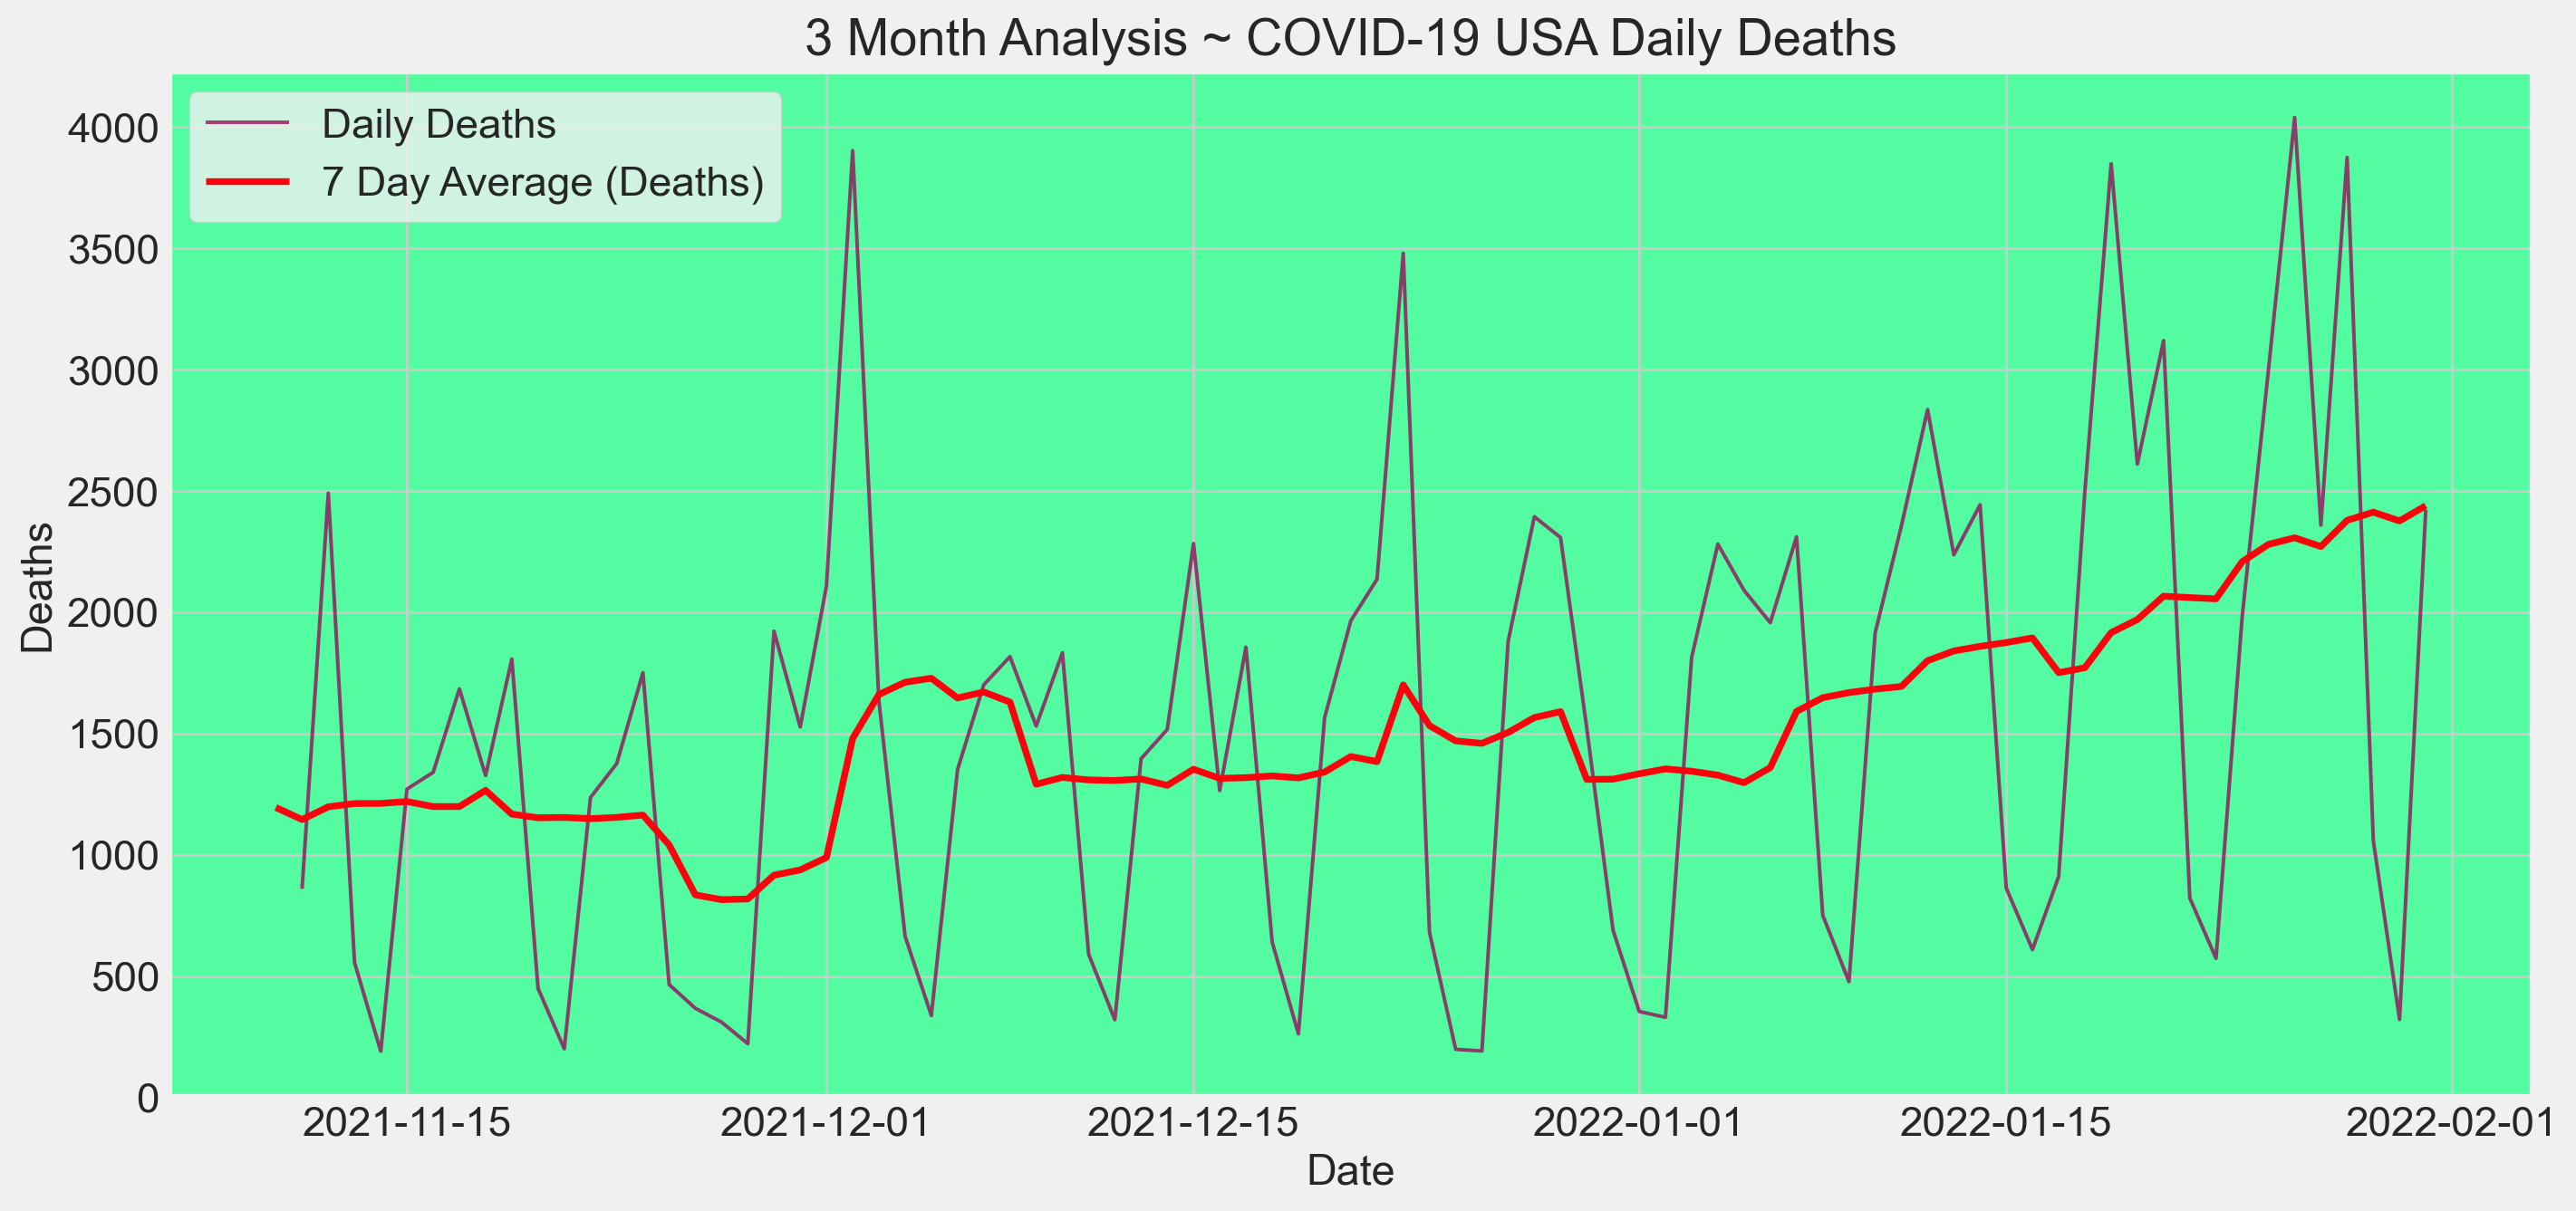

In [17]:
start=today-datetime.timedelta(weeks=12)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,7),dpi=200)
x1=usa['total_deaths'].loc[start:].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',lw=1.43,alpha=0.75, label='Daily Deaths')
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,lw=2.66,color='#ff000d',label='7 Day Average (Deaths)')
ax.set_title('3 Month Analysis ~ COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid19_deaths.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

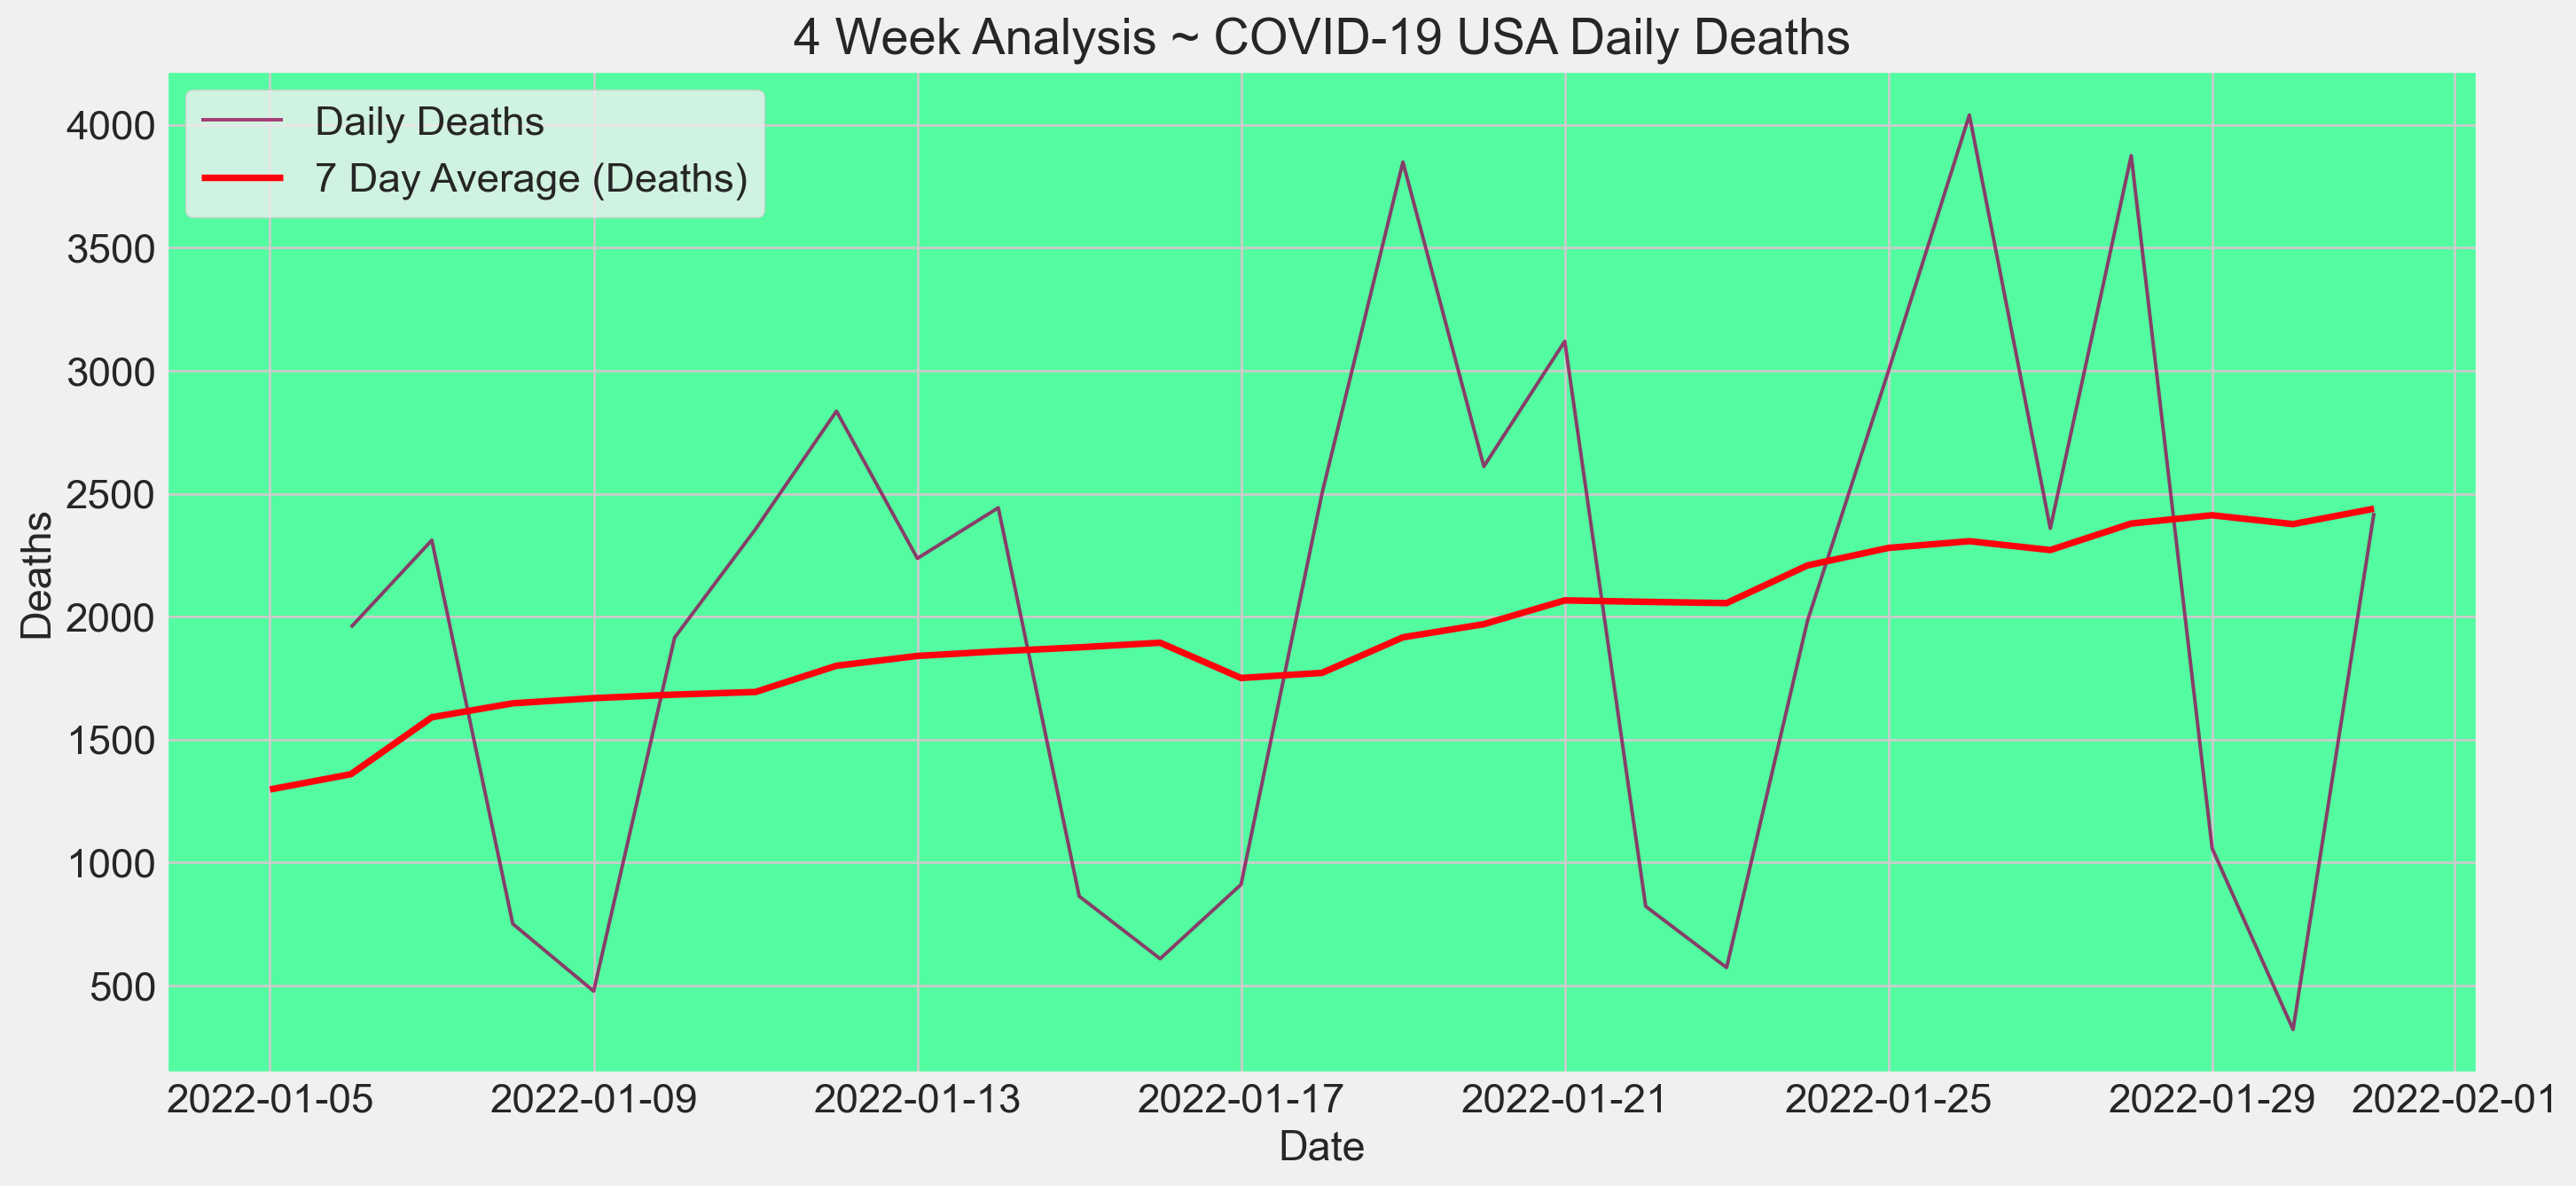

In [18]:
start=today-datetime.timedelta(weeks=4)
end=today
MA7=usa_rolling7.loc[start:]
fig = plt.figure(figsize=(15,7),dpi=200)
x1=usa['total_deaths'].loc[start:].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',lw=1.43,alpha=0.75, label='Daily Deaths')
ax=sns.lineplot(data=MA7, x=MA7.index,y=MA7,lw=2.66,color='#ff000d',label='7 Day Average (Deaths)')
ax.set_title('4 Week Analysis ~ COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid19_deaths.png',dpi=165, bbox_inches='tight')

# <font color='slateblue'> Deadliest COVID-19 day in USA

In [19]:
print(f"{usa_daily.max():,.0f}"," deaths occurred on ",usa_daily.idxmax().strftime("%B, %d, %Y") )

4,442  deaths occurred on  January, 20, 2021
